In [1]:
from baselines import results_plotter
from baselines.bench.monitor import load_results
import os
import pandas as pd
%matplotlib inline

In [2]:
import numpy as np
from os import listdir
from os.path import isfile, join
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
import copy
from matplotlib import ticker

In [3]:
log_path= "./../LOG_final/"
def add_np(a):
    a = np.nan_to_num(a)
    for i in range(a.shape[0]-1):
        a[i+1] = a[i] + a[i+1]
    return a

In [4]:
def average_np(a,thresh=3,max_size=1000):
    result = np.empty(max_size)
    var_list = []
    for i in range(max_size):
        acc = 0
        count = 0
        var = []
        for p in range(len(a)):
            if len(a[p]) > i:
                acc += a[p][i]
                var.append(a[p][i])
                count += 1.0
            #else:
                #count += 1.0
        if count<thresh:
            result[i] = 0
        else:
            result[i] = acc / count
    return result

In [5]:
def get_result(path,g,seeds,compare):
    result = []
    for c in compare:
        tmp = []
        for s in seeds:
            #tmp.append(pd.read_csv(path+c+'/'+g+'/'+s+'/progress.csv',header=0))
            data = pd.read_csv(path+c+'/'+g+'/'+s+'/progress.csv',header=0)
            tmp.append(np.nan_to_num(data['eprewmean']))
            #print(str(c)," with seeds " , s, " timesteps ",data['total_timesteps'].iloc[-1])
        result.append(tmp)
    return result


In [556]:
seeds = ["10","11"]
game = ["BeamRiderNoFrameskip-v4",
"BreakoutNoFrameskip-v4",
"EnduroNoFrameskip-v4",
"PongNoFrameskip-v4",
"SeaquestNoFrameskip-v4",
"SpaceInvadersNoFrameskip-v4",
"QbertNoFrameskip-v4"
]
game = ["PongNoFrameskip-v4"]
path = "/home/ml/pthodo/RL/LOG/atari/raw/benchmark_3/"
param = [[0,0,0],
         [0.25,0,0],
        [0.5,0,0],
         [0.75,0,0],
        ]
compare = []
for p in param:
    compare.append("beta_" + str(p[0]) + "_theta_" + str(p[1]) + "_decay_" + str(p[2]))



Game :  PongNoFrameskip-v4


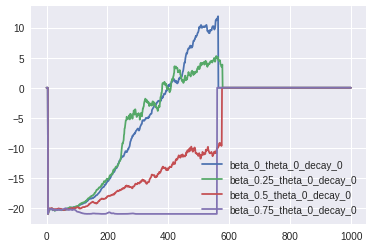

In [557]:
for g in game:
    print("Game : ",g)
    results = get_result(path,g,seeds,compare)
    
    for idx,l in enumerate(results):
        plt.plot(average_np(l,thresh=2,max_size=1000),label=compare[idx])
    plt.legend()
    plt.show()
    

In [270]:
results[0][2]

,serial_timesteps,clipfrac,value_loss,eprewmean,eplenmean,total_timesteps,policy_entropy,nupdates,policy_loss,approxkl,time_elapsed,explained_variance,fps
0,128,0.009033,0.170744,NaN,NaN,4096,1.791026,1,-0.001112,0.000775,43.582191,0.010873,93
1,256,0.000000,0.123452,50.000000,259.500000,8192,1.789506,2,-0.000297,0.000143,87.143367,0.003815,94
2,384,0.046143,0.098106,137.068966,314.103448,12288,1.786044,3,-0.001669,0.000785,131.646013,0.029232,92
3,512,0.009521,0.124627,156.818182,322.212121,16384,1.782128,4,-0.000996,0.000424,176.036302,0.022146,92
4,640,0.052856,0.139642,134.134615,317.134615,20480,1.768244,5,-0.001676,0.001484,219.587483,0.023661,94
5,768,0.076233,0.153743,143.650794,323.523810,24576,1.754504,6,-0.002031,0.001865,262.750977,0.039116,94
6,896,0.033630,0.140873,146.959459,321.027027,28672,1.749105,7,-0.000769,0.000934,306.101419,0.028083,94
7,1024,0.000000,0.201238,150.892857,324.261905,32768,1.745231,8,-0.000457,0.000306,349.613799,0.080865,94
8,1152,0.028259,0.177710,172.422680,331.773196,36864,1.735680,9,-0.000852,0.000987,392.596171,0.095715,95
9,1280,0.045654,0.119485,200.250000,341.970000,40960,1.742995,10,-0.000576,0.000700,435.360015,0.111757,95


In [166]:
results[1][0]

,explained_variance,eprewmean,eplenmean,fps,nupdates,time_elapsed,policy_loss,policy_entropy,total_timesteps,value_loss,approxkl,clipfrac,serial_timesteps
0,0.010218,NaN,NaN,148,1,27.621593,-0.000918,1.790575,4096,0.239998,0.001203,0.010559,128
1,-0.001848,50.000000,267.000000,153,2,54.386070,-0.001341,1.787204,8192,0.073105,0.000785,0.013916,256
2,0.004337,131.666667,316.000000,151,3,81.385762,-0.000954,1.784767,12288,0.151957,0.000593,0.010986,384
3,0.022294,150.781250,323.156250,153,4,108.178837,-0.000795,1.786132,16384,0.152890,0.000370,0.000366,512
4,0.029510,124.509804,315.000000,157,5,134.283015,-0.002195,1.780312,20480,0.132413,0.001103,0.065247,640
5,0.047543,141.935484,324.258065,153,6,161.042591,-0.000129,1.778723,24576,0.120523,0.000157,0.000000,768
6,0.030185,146.785714,326.342857,155,7,187.351760,-0.000630,1.774148,28672,0.160139,0.000404,0.000000,896
7,0.055746,149.418605,326.953488,155,8,213.650675,-0.001406,1.764291,32768,0.131304,0.001203,0.030090,1024
8,0.057391,169.791667,334.697917,153,9,240.385526,-0.000973,1.770485,36864,0.179346,0.000967,0.040466,1152
9,0.066936,177.250000,337.530000,152,10,267.216314,-0.001118,1.764904,40960,0.123259,0.001422,0.034729,1280


0.0

Mujoco

In [56]:
def get_result(path,g,seeds,compare):
    result = []
    for c in compare:
        tmp = []
        print(c)
        for s in seeds:
            print(s)
            #tmp.append(pd.read_csv(path+c+'/'+g+'/'+s+'/progress.csv',header=0))
            data = pd.read_csv(path+c+'/'+g+'/'+s+'/progress.csv',header=0)
            tmp.append(np.nan_to_num(data['eprewmean']))
            #print(str(c)," with seeds " , s, " timesteps ",data['total_timesteps'].iloc[-1])
        result.append(tmp)
    return result


In [79]:
seeds = ["10","11"]
game = ["Swimmer-v2","InvertedDoublePendulum-v2",
"InvertedPendulum-v2",
"HalfCheetah-v2",
"Hopper-v2",
"Walker2d-v2",
"Reacher-v2",

]
game = ['Swimmer-v2']
path = "/home/ml/pthodo/RL/LOG/mujoco/benchmark_var_4/"
param = [[0,0,0,0.0003,1],
         [0.1,0,0,0.0003,1],
        [0.2,0,0,0.0003,1],
        ]
compare = []
for p in param:
    compare.append("lr_"+str(p[-2])+"_beta_" + str(p[0]) + "_theta_" + str(p[1]) + "_decay_" + str(p[2])+ "_noise_"+str(p[-1]))



Game :  Swimmer-v2
lr_0.0003_beta_0_theta_0_decay_0_noise_1
10
11
lr_0.0003_beta_0.1_theta_0_decay_0_noise_1
10
11
lr_0.0003_beta_0.2_theta_0_decay_0_noise_1
10
11


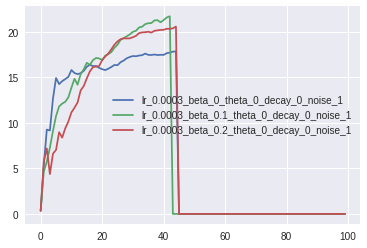

In [80]:
for g in game:
    print("Game : ",g)
    results = get_result(path,g,seeds,compare)
    
    for idx,l in enumerate(results):
        plt.plot(average_np(l,thresh=2,max_size=100),label=compare[idx])
    plt.legend()
    plt.show()

In [574]:
results[0]

[array([  4.874263  ,   2.77185875,   0.327605  ,   0.80675125,
          6.0564385 ,   8.47319158,  10.43691657,  11.60684312,
         13.02704956,  13.84653465,  14.45470009,  15.37040283,
         16.03336635,  17.03092625,  17.9558048 ,  19.02333469,
         19.65807762,  20.24327783,  20.92764611,  21.76429178,
         22.7159484 ,  23.14334647,  23.63168417,  24.09207061,
         24.52781969,  25.04804936,  25.55170747,  26.10196474,
         26.61547951,  27.06747887,  27.49549181,  27.94596989,
         28.443528  ,  28.75073517,  29.18239514,  29.53343549,
         29.86945732,  30.15382912,  30.40708367,  30.63780575,
         30.8706934 ,  31.29852064,  31.50243003,  31.70348668,
         31.89571042,  32.11320045,  32.34809957,  32.51386534,
         32.67578338,  33.49290909,  34.35182488,  35.32503457,
         36.16964781,  36.48496354,  36.85824168,  37.22924527,
         37.71456713,  38.05467477,  38.49074631,  38.92897989,
         39.3392202 ,  39.80472656,  40.

In [337]:
results[1]

[      time_elapsed  policy_loss  explained_variance  serial_timesteps  \
 0         5.002273    -0.008759           -0.922251              2048   
 1         9.731018    -0.026588           -0.263191              4096   
 2        14.161143    -0.042719            0.502542              6144   
 3        18.741095    -0.038031            0.533774              8192   
 4        22.927367    -0.034803            0.545219             10240   
 5        27.164804    -0.025361            0.578114             12288   
 6        31.315737    -0.019928            0.549403             14336   
 7        35.363823    -0.015826            0.613971             16384   
 8        39.489430    -0.016334            0.595984             18432   
 9        43.678410    -0.011524            0.595509             20480   
 10       47.920961    -0.010824            0.562454             22528   
 11       52.544755    -0.011361            0.604125             24576   
 12       56.842768    -0.012037      